In [21]:
print("Ghana Export Columns:", ghana_df.columns)

Ghana Export Columns: Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'Reporter', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'Partner', 'partner2Code', 'partner2ISO',
       'partner2Desc', 'classificationCode', 'classificationSearchCode',
       'isOriginalClassification', 'HS_Code', 'cmdDesc', 'aggrLevel', 'isLeaf',
       'customsCode', 'customsDesc', 'mosCode', 'motCode', 'motDesc',
       'qtyUnitCode', 'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode',
       'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt',
       'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated', 'cifvalue',
       'TradeValue_USD', 'primaryValue', 'legacyEstimationFlag', 'isReported',
       'isAggregate', 'Group', 'DataType', 'Year', 'TradeFlowName'],
      dtype='object')


In [22]:
print("Mirror Import Columns:", mirror_df.columns)

Mirror Import Columns: Index(['Nomenclature', 'ReporterISO3', 'HS_Code', 'Reporter', 'PartnerISO3',
       'Partner', 'Year', 'TradeFlowName', 'TradeFlowCode',
       'TradeValue_USD_Thousands', 'Group', 'DataType', 'TradeValue_USD'],
      dtype='object')


In [23]:
import pandas as pd
import numpy as np


brics = pd.read_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/data/brics_imports_from_sa.csv")
g7 = pd.read_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/data/g7_imports_from_sa.csv")
ghana_brics = pd.read_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/data/ghana_exports_to_brics_data.csv")
ghana_g7 = pd.read_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/data/ghana_exports_to_g7_data.csv")

brics['Group'] = 'BRICS'
brics['DataType'] = 'Mirror_Import'

g7['Group'] = 'G7'
g7['DataType'] = 'Mirror_Import'

ghana_brics['Group'] = 'BRICS'
ghana_brics['DataType'] = 'Direct_Export'

ghana_g7['Group'] = 'G7'
ghana_g7['DataType'] = 'Direct_Export'


mirror_df = pd.concat([brics, g7], ignore_index=True)
ghana_df = pd.concat([ghana_brics, ghana_g7], ignore_index=True)

mirror_df = mirror_df.rename(columns={
    'ReporterName': 'Reporter',
    'PartnerName': 'Partner',
    'ProductCode': 'HS_Code',
    'TradeValue in 1000 USD': 'TradeValue_USD_Thousands'
})
mirror_df['TradeValue_USD'] = mirror_df['TradeValue_USD_Thousands'] * 1000


ghana_df = ghana_df.rename(columns={
    'reporterDesc': 'Reporter',
    'partnerDesc': 'Partner',
    'cmdCode': 'HS_Code',
    'fobvalue': 'TradeValue_USD'
})

ghana_df['Year'] = ghana_df['refYear']
ghana_df['TradeFlowName'] = 'Export'

mirror_df_cleaned = mirror_df[[
    'Year', 'Reporter', 'Partner', 'Group', 'HS_Code', 
    'TradeFlowName', 'TradeValue_USD', 'DataType'
]]

ghana_df_cleaned = ghana_df[[
    'Year', 'Reporter', 'Partner', 'Group', 'HS_Code', 
    'TradeFlowName', 'TradeValue_USD', 'DataType'
]]

final_combined_df = pd.concat([mirror_df_cleaned, ghana_df_cleaned], ignore_index=True)

final_combined_df.to_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/output/gold_trade_combined_cleaned.csv", index=False)

print("✅ All datasets cleaned and merged successfully!")


✅ All datasets cleaned and merged successfully!


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/output/gold_trade_combined_cleaned.csv")
df.head()

,Year,Reporter,Partner,Group,HS_Code,TradeFlowName,TradeValue_USD,DataType
0,2022,Brazil,South Africa,BRICS,7108,Import,2.173000e+03,Mirror_Import
1,2023,Brazil,South Africa,BRICS,7108,Import,4.323000e+03,Mirror_Import
2,2024,Brazil,South Africa,BRICS,7108,Import,1.468000e+03,Mirror_Import
3,2022,China,South Africa,BRICS,7108,Import,8.852770e+09,Mirror_Import
4,2023,China,South Africa,BRICS,7108,Import,1.008654e+10,Mirror_Import


In [26]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Reporters:", df['Reporter'].unique())
print("Partners:", df['Partner'].unique())
print("Groups:", df['Group'].unique())
print("Data Types:", df['DataType'].unique())


Shape: (63, 8)
Columns: ['Year', 'Reporter', 'Partner', 'Group', 'HS_Code', 'TradeFlowName', 'TradeValue_USD', 'DataType']
Reporters: ['Brazil' 'China' 'India' 'Canada' 'Germany' 'France' 'United Kingdom'
 'Italy' 'United States' 'Ghana']
Partners: ['South Africa' 'Brazil' 'China' 'India' 'Canada' 'France' 'Germany'
 'Italy' 'Japan' 'United Kingdom' 'USA']
Groups: ['BRICS' 'G7']
Data Types: ['Mirror_Import' 'Direct_Export']


In [ ]:
# Analysing Trends

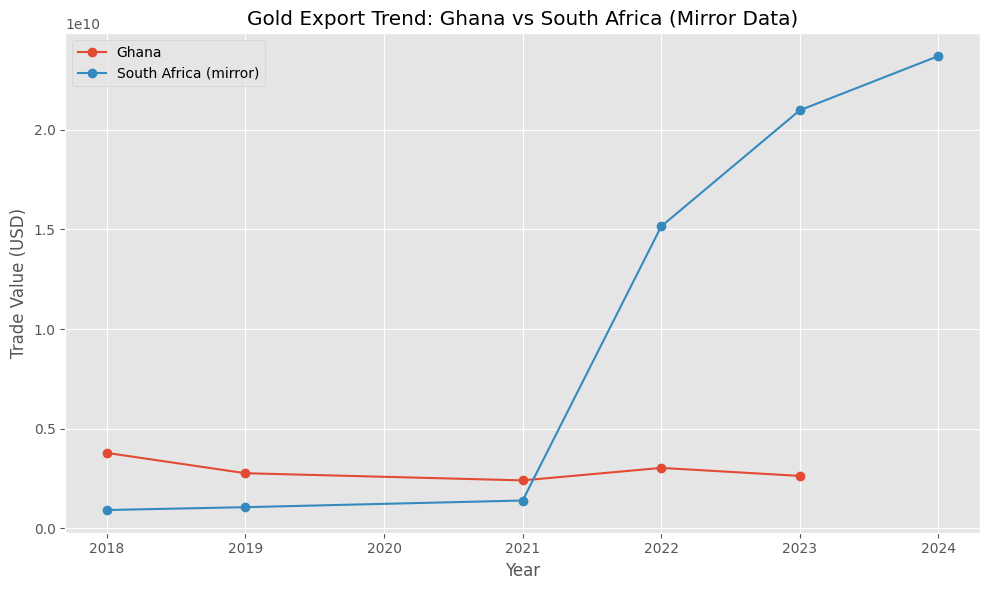

In [28]:
ghana_export = df[df['Reporter'] == 'Ghana'].groupby('Year')['TradeValue_USD'].sum()
sa_export = df[df['Partner'] == 'South Africa'].groupby('Year')['TradeValue_USD'].sum()

# Combine into one DataFrame
trend = pd.DataFrame({
    'Ghana': ghana_export,
    'South Africa (mirror)': sa_export
})
trend.plot(marker='o', figsize=(10, 6))
plt.title("Gold Export Trend: Ghana vs South Africa (Mirror Data)")
plt.ylabel("Trade Value (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


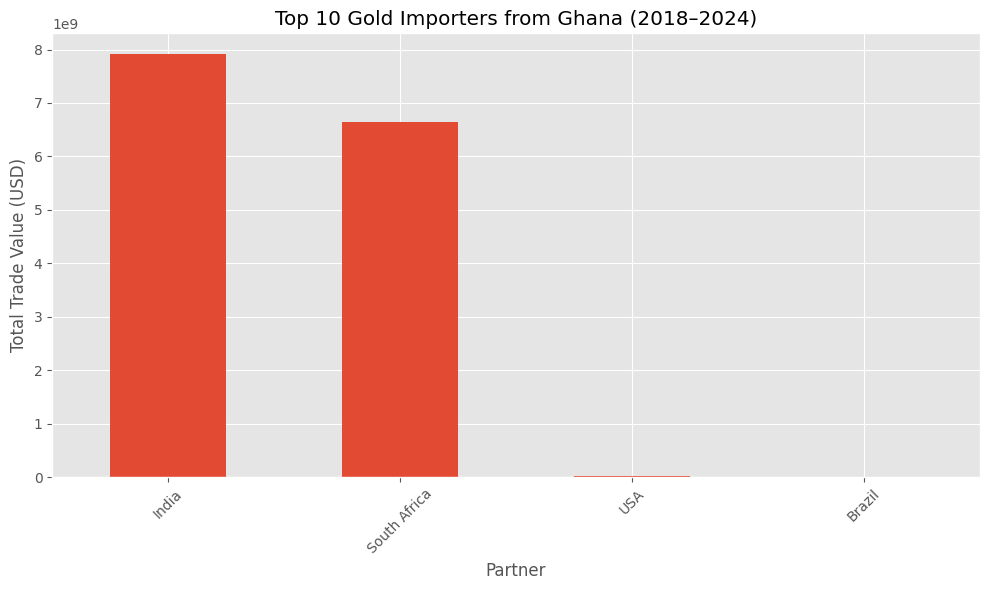

In [31]:
top_importers = df[df['Reporter'] == 'Ghana'] \
    .groupby('Partner')['TradeValue_USD'].sum().sort_values(ascending=False).head(4)

top_importers.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Gold Importers from Ghana (2018–2024)")
plt.ylabel("Total Trade Value (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

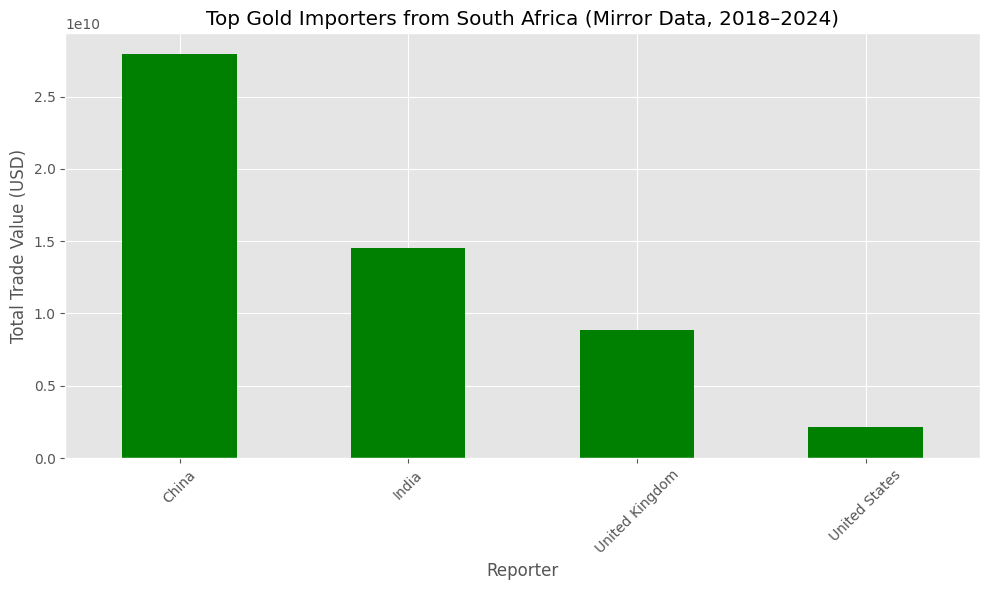

In [32]:
sa_mirror_imports = df[(df['Partner'] == 'South Africa') & (df['DataType'] == 'Mirror_Import')]

top_importers_sa = sa_mirror_imports.groupby('Reporter')['TradeValue_USD'].sum() \
    .sort_values(ascending=False).head(4)

# Plot
top_importers_sa.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Top Gold Importers from South Africa (Mirror Data, 2018–2024)")
plt.ylabel("Total Trade Value (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

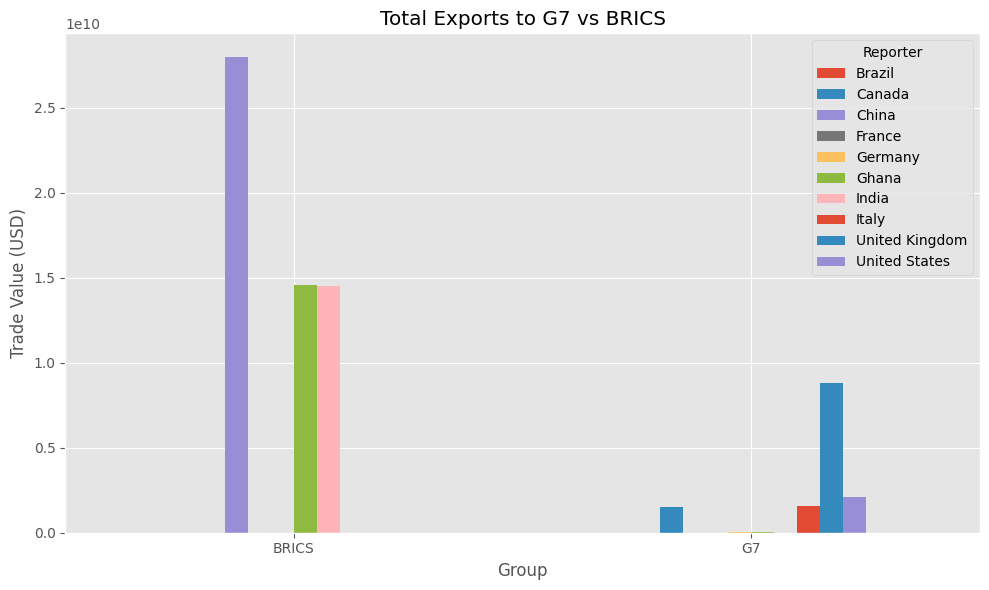

In [33]:
bloc_total = df.groupby(['Group', 'Reporter'])['TradeValue_USD'].sum().unstack().fillna(0)

bloc_total.plot(kind='bar', figsize=(10, 6))
plt.title("Total Exports to G7 vs BRICS")
plt.ylabel("Trade Value (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

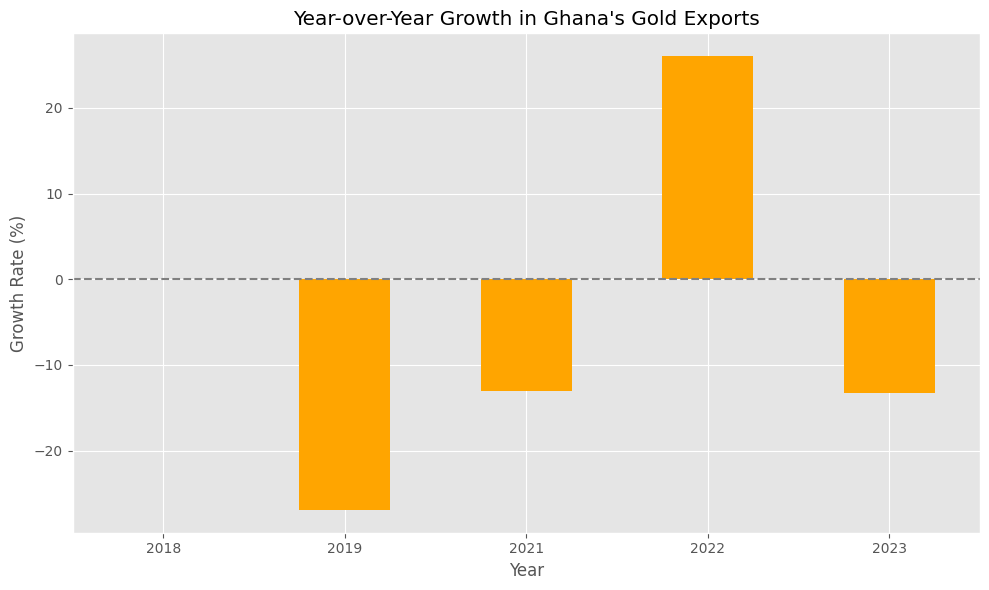

In [34]:
ghana_trend = df[df['Reporter'] == 'Ghana'] \
    .groupby('Year')['TradeValue_USD'].sum()

ghana_growth = ghana_trend.pct_change().fillna(0) * 100

ghana_growth.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Year-over-Year Growth in Ghana's Gold Exports")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
trend.to_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/output/export_trend_ghana_vs_sa.csv")
top_importers.to_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/output/top_importers_from_ghana.csv")
bloc_total.to_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/output/total_exports_by_bloc.csv")
ghana_growth.to_csv("/Users/arnavbhardwaj/Documents/Data Science & Business Final Project/Project/Gold_Trade_Project/output/ghana_yoy_growth.csv")